In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.linalg as la

# Finite Difference Method

### Finite Difference on  $u(x)=sin((x+π)^2+1)$

In [100]:
N = 10
B = 1
A = 0
domain = np.array(np.linspace(A,B,N+1))
H = (B-A)/N
u_ = lambda x: np.sin((x+np.pi)**2-1)
padding = np.zeros(N-1)
tri1 = np.vstack(((np.vstack((np.diag([-1]*(N-1)),padding))),padding)).T
tri2 = np.vstack((padding,np.vstack((padding,np.diag([1]*(N-1)))))).T
tri3 = tri1+tri2
y_ = u_(domain)
result1 = (1/(2*H))*(tri3.dot(y_))

In [101]:
u_ = lambda x: np.sin((x+np.pi)**2-1)
padding = np.zeros(N-1)
tri1 = np.vstack(((np.vstack((np.diag([1]*(N-1)),padding))),padding)).T
tri2 = np.vstack((padding,np.vstack((padding,np.diag([1]*(N-1)))))).T
tri3 = np.vstack((padding,np.vstack((np.diag([-2]*(N-1)),padding)))).T
tri4 = tri1+tri2+tri3
y_ = u_(domain)
result2 = (1/(2*H))*(tri3.dot(y_))

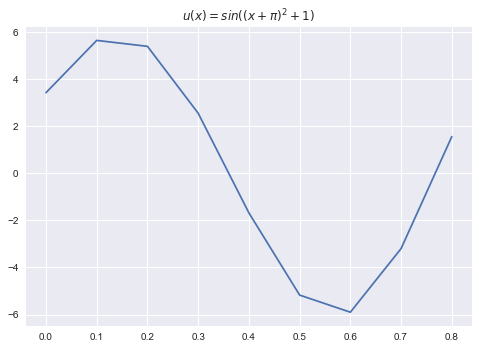

In [102]:
plt.title('$u(x)=sin((x+\pi)^2+1)$')
plt.plot(domain[:-2],.5*(result2-result1))
plt.show()

### Singularly Perturbed BVP with  $f(x) = -1$

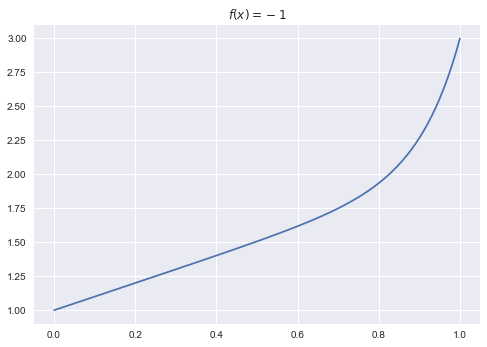

In [103]:
def bvp(f = lambda x: -1, epsilon=.1, alpha=1, beta=3, N=N):
    M = N
    e = epsilon
    B = 1
    A = 0
    H = (B-A)/M
    alpha_ = [-1 - alpha*(e+.5*H)/H**2]
    beta_ = [-1-beta*(e-.5*H)/H**2]
    offset = np.array([-1,0,1])
    n_1 = np.array([e+.5*H]*M)
    n_0 = np.array([-2*e]*M)
    n11 = np.array([e-.5*H]*M)
    vec = np.array([n_1,n_0,n11])
    this = sp.spdiags(vec,offset,M-1,M-1)
    this = (1/H**2)*this.todense()
    ux = alpha_ + [-1]*(M-3) + beta_
    listado = list(la.solve(this,ux))
    result = [alpha]+listado+[beta]
    return(np.array(result))

result = bvp(f,N=100)
domain = np.linspace(A,B,num=M+1)
plt.plot(domain,result)
plt.title('$f(x) = -1$')
plt.show()

### Heurestic Test for Convergence

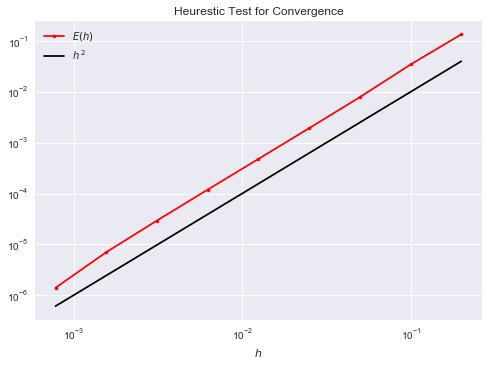

The order of the finite difference approximation is about  2.06975083279 .


In [104]:
num_approx = 10 # Number of Approximations
N = 5*np.array([2**j for j in range(num_approx)])
h, max_error = (1.-0)/N[:-1], np.ones(num_approx-1)

# Best numerical solution, used to approximate the true solution.
# bvp returns the grid, and the grid function, approximating the solution
# with N subintervals of equal length.
num_sol_best = bvp(lambda x:-1, epsilon=.1, alpha=1, beta=3, N=N[-1])

for j in range(len(N)-1):
    num_sol = bvp(lambda x:-1, epsilon=.1, alpha=1, beta=3, N=N[j])
    max_error[j] = np.max(np.abs(num_sol-num_sol_best[::2**(num_approx-j-1)]))

plt.loglog(h,max_error,'.-r',label="$E(h)$")
plt.loglog(h,h**(2.),'-k',label="$h^{\, 2}$")
plt.xlabel("$h$")
plt.legend(loc='best')
plt.title('Heurestic Test for Convergence')
plt.show()
print("The order of the finite difference approximation is about ",
    (np.log(max_error[0])-np.log(max_error[-1]))/(np.log(h[0])-np.log(h[-1])),
    ".")

### Finite Difference on $\epsilon y − 4(π − x^2)y = cos x$

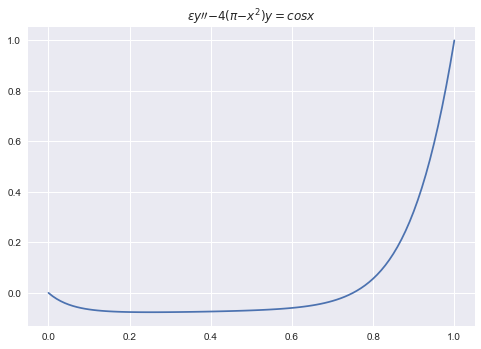

In [106]:
def bvp4(f = lambda x: np.cos(x), A=0, B=.5*np.pi, alpha=0, beta=1, N=100):
    M = N
    H = (B-A)/M
    domain = np.linspace(A,B,num=M+1)
        
    e_1 = lambda x: .1
    e_2 = lambda x: 0
    e_3 = lambda x: -4*(np.pi - x**2)
    
    alpha_ = [f(domain[1]) - alpha*(e_1(domain[0]) + .5*H*e_2(domain[0]))*(1/H**2)]
    beta_  = [f(domain[-2]) - beta*(e_1(domain[-1]) - .5*H*e_2(domain[-1]))*(1/H**2)]
    offset = np.array([-1,0,1])

    nn_1 = np.array([(e_1(x) + .5*H*e_2(x)) for x in domain[:-2]])
    nn_0 = np.array([(e_3(x)*H**2 - 2*e_1(x)) for x in domain[1:-1]])
    nn11 = np.array([(e_1(x) - .5*H*e_2(x)) for x in domain[2:]])
    
    vec = np.array([nn_1,nn_0,nn11])
    this = sp.spdiags(vec,offset,M-1,M-1)
    this = (1/H**2)*this.todense()
    ux = alpha_ + [f(x) for x in domain[1:-3]] + beta_
    listado = list(la.solve(this,ux))
    result = [alpha] + listado + [beta]
    
    return(np.array(result))

result = bvp4()
domain = np.linspace(A,B,num=M+1)
plt.style.use("seaborn")
plt.plot(domain,result)
plt.title('$\epsilon y\prime\prime − 4(π − x^2)y = cos x$')
plt.show()

### Finite Difference on $\epsilon y'' + y' x = -\epsilon π^2 cos(π x)-π x sin(π x)$

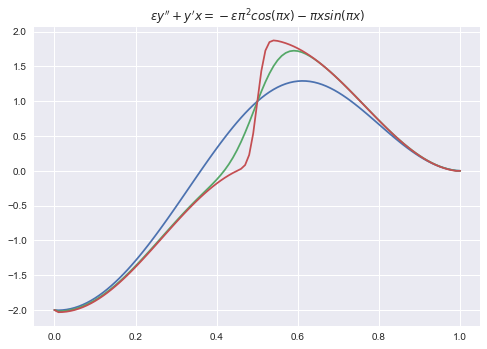

In [107]:
def bvp5(epsilon,f, A=-1, B=1, alpha=-2, beta=0, N=100):
    M = N
    H = (B-A)/M
    domain = np.linspace(A, B, num=M+1)
        
    e_1 = lambda x: epsilon
    e_2 = lambda x: x
    e_3 = lambda x: 0
    
    alpha_ = [f(domain[1]) - alpha*(e_1(domain[0]) - .5*H*e_2(domain[0]))*(1/H**2)]
    beta_  = [f(domain[-2]) - beta*(e_1(domain[-1]) + .5*H*e_2(domain[-1]))*(1/H**2)]
    offset = np.array([-1,0,1])

    nn_1 = np.array([(e_1(x) - .5*H*e_2(x)) for x in domain[2:]])
    nn_0 = np.array([(e_3(x)*H**2 - 2*e_1(x)) for x in domain[1:-1]])
    nn11 = np.array([(e_1(x) + .5*H*e_2(x)) for x in domain[:-2]])
    
    vec = [nn_1,nn_0,nn11]
    this = sp.spdiags((nn_1,nn_0,nn11),offset,M-1,M-1)
    this = (1/H**2)*this.todense()
    ux = alpha_ + [f(x) for x in domain[1:-3]] + beta_
    listado = list(la.solve(this,ux))
    result = [alpha] + listado + [beta]
    
    return(np.array(result))



for i in [.1,.01,.001]:
    f = lambda x: -i*np.pi**2*np.cos(np.pi*x)-np.pi*x*np.sin(np.pi*x)
    result = bvp5(i,f)
    domain = np.linspace(A,B,num=M+1)
    plt.style.use("seaborn")
    plt.plot(domain,result)
plt.title('$\epsilon y\'\' + y\' x = - \epsilon π^2 cos(π x)-π x sin(π x)$')
plt.show()

### Finite Difference on $(\epsilon + x^2)y'' +4x y' + 2y = 0$

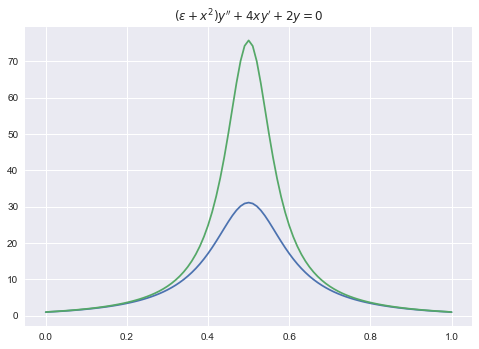

In [108]:
def bvp5(epsilon,f, A=-1, B=1, N=100):
    alpha = 1/(1+epsilon)
    beta = 1/(1+epsilon)
    M = N
    H = (B-A)/M
    domain = np.linspace(A, B, num=M+1)
        
    e_1 = lambda x: epsilon + x**2
    e_2 = lambda x: 4*x
    e_3 = lambda x: 2
    
    alpha_ = [f(domain[1]) - alpha*(e_1(domain[0]) - .5*H*e_2(domain[0]))*(1/H**2)]
    beta_  = [f(domain[-2]) - beta*(e_1(domain[-1]) + .5*H*e_2(domain[-1]))*(1/H**2)]
    offset = np.array([-1,0,1])

    nn_1 = np.array([(e_1(x) - .5*H*e_2(x)) for x in domain[2:]])
    nn_0 = np.array([(e_3(x)*H**2 - 2*e_1(x)) for x in domain[1:-1]])
    nn11 = np.array([(e_1(x) + .5*H*e_2(x)) for x in domain[:-2]])
    
    vec = [nn_1,nn_0,nn11]
    this = sp.spdiags((nn_1,nn_0,nn11),offset,M-1,M-1)
    this = (1/H**2)*this.todense()
    ux = alpha_ + [f(x) for x in domain[1:-3]] + beta_
    listado = list(la.solve(this,ux))
    result = [alpha] + listado + [beta]
    
    return(np.array(result))



for i in [.05,.02]:
    f = lambda x: -i*np.pi**2*np.cos(np.pi*x)-np.pi*x*np.sin(np.pi*x)
    result = bvp5(i,f)
    domain = np.linspace(A,B,num=M+1)
    plt.style.use("seaborn")
    plt.plot(domain,result)
plt.title('$(\epsilon + x^2)y\'\' +4x y\' + 2y = 0$')
plt.show()